# MODELAGEM

In [144]:
# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualizações
import matplotlib as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [145]:
# Carregar os dados já pré-processados

dataset = pd.read_csv('dados_tratados.csv')
dataset

,Valor_Total_Declarado,Idade_Posse,Municipio,Partido,UF_Nascimento,Genero,Grau_Instrucao,Estado_Civil,Declar_Racial,Reeleicao,Declar_Bens,Situacao
0,0.059820,-0.429375,4,2,1,0,7,1,3,0,1,0
1,0.396182,-1.568580,4,1,1,1,5,1,1,0,1,0
2,0.053502,1.279432,4,2,2,0,5,0,4,0,1,0
3,-0.390232,0.045294,0,1,2,1,5,1,3,0,1,0
4,-0.321329,-0.524309,4,2,1,0,5,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9278,-0.266207,1.279432,4,1,1,1,7,1,1,0,1,0
9279,-0.390108,0.425029,4,1,1,0,5,0,3,0,1,1
9280,-0.415037,-0.904044,4,2,1,0,5,0,3,0,1,1
9281,-0.317195,0.899697,1,2,1,0,2,1,4,0,1,0


In [146]:
# MUNICIPIOS
# GRANDE = 0; MEDIO = 1; MINUSCULA = 2; PAUD'ARCO = 3; PEQUENO = 4

# PARTIDO
# 'PEQUENO':0, 'MEDIO': 1, 'GRANDE':2

# UF_NASCIMENTO
# 'Estrangeiro':0, 'PA': 1, 'outros':2

# GENERO
# 'FEMININO':1, 'MASCULINO': 0

# GRAU INSTRUCAO
# 'ANALFABETO': 0, 'LÊ E ESCREVE': 1, 'ENSINO FUNDAMENTAL INCOMPLETO': 2, 
# 'ENSINO FUNDAMENTAL COMPLETO': 3, 'ENSINO MÉDIO INCOMPLETO': 4, 
# 'ENSINO MÉDIO COMPLETO': 5, 'SUPERIOR INCOMPLETO': 6, 'SUPERIOR COMPLETO': 7

# ESTADO CIVIL
# 'SOLTEIRO(A)':0, 'CASADO(A)': 1, 'DIVORCIADO(A)': 2,
# 'SEPARADO(A) JUDICIALMENTE': 3, 'VIÚVO(A)': 4

# DECLAR_RACIAL
# PARDA = 0; BRANCA = 1; PRETA = 2, SEM INFORMAÇÃO = 3; ÍNDIGENA = 4; AMARELA = 5

# REELEIÇÃO
# 'S':1, 'N': 0

# DECLAR BENS
# 'S':1, 'N': 0

# SITUAÇÃO
# 'ELEITO':1, 'NÃO ELEITO': 0

In [147]:
# Separar dados em variáveis preditoras e variável alvo

#separamos x de y
y = dataset['Situacao'].values
X = dataset.iloc[:,0:11].values
X

array([[ 0.05982015, -0.42937492,  4.        , ...,  3.        ,
         0.        ,  1.        ],
       [ 0.39618248, -1.56857964,  4.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.05350177,  1.27943215,  4.        , ...,  4.        ,
         0.        ,  1.        ],
       ...,
       [-0.41503663, -0.90404356,  4.        , ...,  3.        ,
         0.        ,  1.        ],
       [-0.31719478,  0.89969724,  1.        , ...,  4.        ,
         0.        ,  1.        ],
       [-0.19596047, -0.7141761 ,  4.        , ...,  3.        ,
         0.        ,  1.        ]])

In [148]:
# Separar dados em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# KNN

In [149]:
# Algoritmo KNN K=7

knn1 = KNeighborsClassifier(n_neighbors = 7)
knn1.fit(X_train, y_train)
Y_pred = knn1.predict(X_test)
acc_knn1 = round(knn1.score(X_test, y_test) * 100, 2)
acc_knn1

86.0

In [150]:
# Algoritmo KNN K=5

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train, y_train)
Y_pred = knn2.predict(X_test)
acc_knn2 = round(knn2.score(X_test, y_test) * 100, 2)
acc_knn2

85.53

In [151]:
# Algoritmo KNN K=3

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
Y_pred = knn3.predict(X_test)
acc_knn3 = round(knn3.score(X_test, y_test) * 100, 2)
acc_knn3

84.17

# ÁRVORES DE DECISÃO

In [152]:
# Algoritmo Árvore de Decisão sem definir a profundidade máxima

decision_tree0 = DecisionTreeClassifier(criterion='entropy', random_state=15) # Árvore com profundidade 2
decision_tree0.fit(X_train, y_train)
Y_pred = decision_tree0.predict(X_test)
acc_decision_tree0 = round(decision_tree0.score(X_test, y_test) * 100, 2)
acc_decision_tree0

80.65

In [153]:
# Algoritmo Árvore de Decisão com profundidade máxima = 2

decision_tree1 = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=15) # Árvore com profundidade 2
decision_tree1.fit(X_train, y_train)
Y_pred = decision_tree1.predict(X_test)
acc_decision_tree1 = round(decision_tree1.score(X_test, y_test) * 100, 2)
acc_decision_tree1


87.18

In [154]:
# Algoritmo Árvore de Decisão com profundidade máxima = 4

decision_tree2 = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=15) # Árvore com profundidade 4
decision_tree2.fit(X_train, y_train)
Y_pred = decision_tree2.predict(X_test)
acc_decision_tree2 = round(decision_tree2.score(X_test, y_test) * 100, 2)
acc_decision_tree2

87.11

In [155]:
# Cria uma área de gráfico de tamanho específico
# Importa a biblioteca tree
import sklearn.tree
import matplotlib.pyplot as pyp



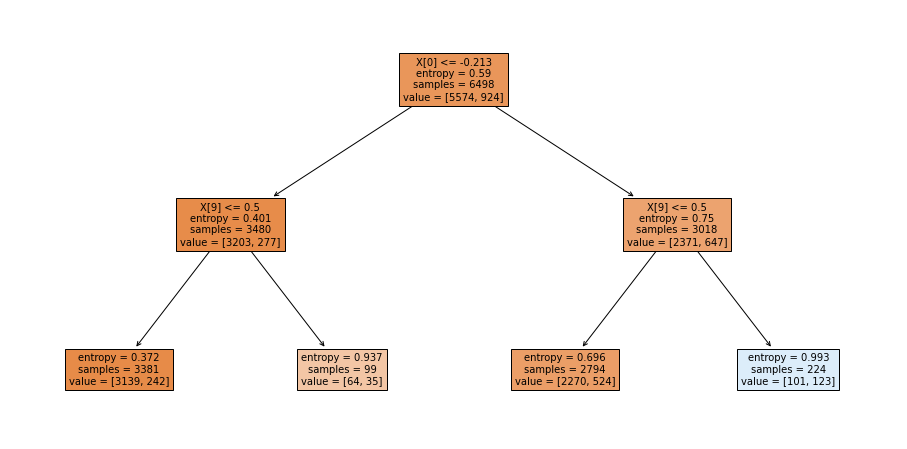

In [156]:
# ÁRVORE PARA PROFUNDIDADE = 2

# Cria uma área de gráfico de tamanho específico
fig, ax = pyp.subplots(figsize=(16, 8))
# Plota a árvore preenchida pela cor da classe que predomina no nó
arvore1 = sklearn.tree.plot_tree(decision_tree1, max_depth=1000, fontsize=
10, filled=True, ax=ax)

In [157]:
# Pela entropia o nodo raiz escolhido foi 'Valor Total Declarado'
# Depois o modelo verifica se o candidato concorreu a reeleição

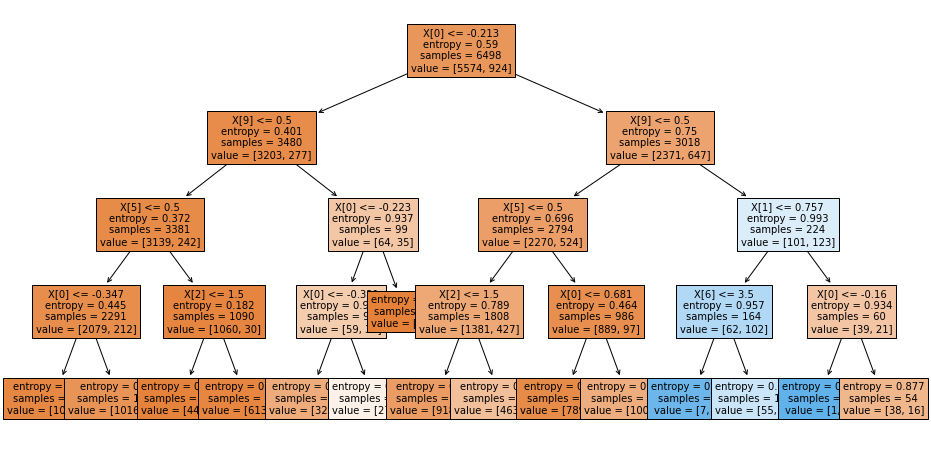

In [158]:
# ÁRVORE PARA PROFUNDIDADE = 4

# Cria uma área de gráfico de tamanho específico
fig, ax = pyp.subplots(figsize=(16, 8))
# Plota a árvore preenchida pela cor da classe que predomina no nó
arvore1 = sklearn.tree.plot_tree(decision_tree2, max_depth=1000, fontsize=
10, filled=True, ax=ax)

In [159]:
# Pela entropia o nodo raiz escolhido foi 'Valor Total Declarado'
# Depois o modelo verifica se o candidato concorreu a reeleição
# Depois o modelo verifica o genero
# Assim por diante

# Florestas Aleatórias

In [160]:
# Random Forest com criterio entropy

random_forest1 = RandomForestClassifier(n_estimators=500, criterion= 'entropy', random_state=15)
random_forest1.fit(X_train, y_train)
Y_pred = random_forest1.predict(X_test)
random_forest1.score(X_train, y_train)
acc_random_forest1 = round(random_forest1.score(X_test, y_test) * 100, 2)
acc_random_forest1

86.46

In [161]:
# Random Forest com criterio gini

random_forest2 = RandomForestClassifier(n_estimators=500, criterion= 'gini', random_state=15)
random_forest2.fit(X_train, y_train)
Y_pred = random_forest2.predict(X_test)
random_forest2.score(X_train, y_train)
acc_random_forest2 = round(random_forest2.score(X_test, y_test) * 100, 2)
acc_random_forest2

86.57

In [162]:
models1 = pd.DataFrame({
    'Model': ['KNN com K=7', 'KNN com K=5', 'KNN com K=3', 
              'Árvore de Decisão', 'Árvore de Decisão com Profundidade Máxima=2', 'Árvore de Decisão com Profundidade Máxima=4', 
              'Floresta Aleatória (Entropy)', 'Floresta Aleatória (Gini)'],
    'Score': [acc_knn1, acc_knn2, acc_knn3, 
              acc_decision_tree0, acc_decision_tree1, acc_decision_tree2, 
              acc_random_forest1, acc_random_forest2]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Árvore de Decisão com Profundidade Máxima=2,87.18
5,Árvore de Decisão com Profundidade Máxima=4,87.11
7,Floresta Aleatória (Gini),86.57
6,Floresta Aleatória (Entropy),86.46
0,KNN com K=7,86.00
1,KNN com K=5,85.53
2,KNN com K=3,84.17
3,Árvore de Decisão,80.65


In [163]:
# O modelo com Score melhor foi o de Árvore de Decisão com max_depth=2

In [164]:
# Verificando outras métricas para o modelo

Previsoes = decision_tree1.predict(X_test)

from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_test, Previsoes)
print(Matriz)

[[2370   28]
 [ 329   58]]


In [165]:
from sklearn.metrics import classification_report

report = classification_report(y_test, Previsoes)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2398
           1       0.67      0.15      0.25       387

    accuracy                           0.87      2785
   macro avg       0.78      0.57      0.59      2785
weighted avg       0.85      0.87      0.83      2785



In [166]:
# Podemos ver que o modelo acerta muito quando o candidato não é eleito e acerta pouco quando o candidato é eleito
# Precisamos balancear a Classe

# Balanceamento da Classe


In [167]:
# Biblioteca necessária para balancear a classe

from imblearn.over_sampling import SMOTENC

In [168]:
# Verificando o equilibrio da Classe

np.bincount(y)

array([7972, 1311], dtype=int64)

In [169]:
# Balanceamento da classe

sm = SMOTENC(random_state=42, categorical_features=[0,1])
X, y= sm.fit_resample(X, y)

In [170]:
# Verificando o equilibrio da Classe

np.bincount(y)

array([7972, 7972], dtype=int64)

In [171]:
# Agora o modelo tá balanceado

In [172]:
# Verificando se o tamanho dos dados mudou
len(X)

15944

In [173]:
# Separar dados em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# KNN

In [186]:
# Algoritmo KNN K=7

knn1 = KNeighborsClassifier(n_neighbors = 7)
knn1.fit(X_train, y_train)
Y_pred = knn1.predict(X_test)
acc_knn1 = round(knn1.score(X_test, y_test) * 100, 2)
acc_knn1

76.99

In [187]:
# Algoritmo KNN K=5

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train, y_train)
Y_pred = knn2.predict(X_test)
acc_knn2 = round(knn2.score(X_test, y_test) * 100, 2)
acc_knn2

77.65

In [188]:
# Algoritmo KNN K=3

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
Y_pred = knn3.predict(X_test)
acc_knn3 = round(knn3.score(X_test, y_test) * 100, 2)
acc_knn3

78.32

# Árvores de Decisão

In [189]:
# Algoritmo Árvore de Decisão sem definir a profundidade máxima

decision_tree0 = DecisionTreeClassifier(criterion='entropy', random_state=15) # Árvore com profundidade 2
decision_tree0.fit(X_train, y_train)
Y_pred = decision_tree0.predict(X_test)
acc_decision_tree0 = round(decision_tree0.score(X_test, y_test) * 100, 2)
acc_decision_tree0

81.96

In [190]:
# Algoritmo Árvore de Decisão com profundidade máxima = 2

decision_tree1 = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=15) # Árvore com profundidade 2
decision_tree1.fit(X_train, y_train)
Y_pred = decision_tree1.predict(X_test)
acc_decision_tree1 = round(decision_tree1.score(X_test, y_test) * 100, 2)
acc_decision_tree1

68.29

In [191]:
# Algoritmo Árvore de Decisão com profundidade máxima = 4

decision_tree2 = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=15) # Árvore com profundidade 4
decision_tree2.fit(X_train, y_train)
Y_pred = decision_tree2.predict(X_test)
acc_decision_tree2 = round(decision_tree2.score(X_test, y_test) * 100, 2)
acc_decision_tree2

69.57

# Florestas Aleatórias

In [192]:
# Random Forest com criterio entropy

random_forest1 = RandomForestClassifier(n_estimators=500, criterion= 'entropy', random_state=15)
random_forest1.fit(X_train, y_train)
Y_pred = random_forest1.predict(X_test)
random_forest1.score(X_train, y_train)
acc_random_forest1 = round(random_forest1.score(X_test, y_test) * 100, 2)
acc_random_forest1

88.36

In [193]:
# Random Forest com criterio gini

random_forest2 = RandomForestClassifier(n_estimators=500, criterion= 'gini', random_state=15)
random_forest2.fit(X_train, y_train)
Y_pred = random_forest2.predict(X_test)
random_forest2.score(X_train, y_train)
acc_random_forest2 = round(random_forest2.score(X_test, y_test) * 100, 2)
acc_random_forest2

88.25

In [195]:
models2 = pd.DataFrame({
    'Model': ['KNN com K=7', 'KNN com K=5', 'KNN com K=3', 
              'Árvore de Decisão', 'Árvore de Decisão com Profundidade Máxima=2', 'Árvore de Decisão com Profundidade Máxima=4', 
              'Floresta Aleatória (Entropy)', 'Floresta Aleatória (Gini)'],
    'Score': [acc_knn1, acc_knn2, acc_knn3, 
              acc_decision_tree0, acc_decision_tree1, acc_decision_tree2, 
              acc_random_forest1, acc_random_forest2]})
models2.sort_values(by='Score', ascending=False)

,Model,Score
6,Floresta Aleatória (Entropy),88.36
7,Floresta Aleatória (Gini),88.25
3,Árvore de Decisão,81.96
2,KNN com K=3,78.32
1,KNN com K=5,77.65
0,KNN com K=7,76.99
5,Árvore de Decisão com Profundidade Máxima=4,69.57
4,Árvore de Decisão com Profundidade Máxima=2,68.29


In [197]:
# O modelo com Score melhor foi o de Floresta Aleatória com criterio Entropia

In [201]:
# Verificando outras métricas para o modelo

Previsoes = random_forest1.predict(X_test)

from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_test, Previsoes)
print(Matriz)

[[2064  321]
 [ 236 2163]]


In [202]:
from sklearn.metrics import classification_report

report = classification_report(y_test, Previsoes)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2385
           1       0.87      0.90      0.89      2399

    accuracy                           0.88      4784
   macro avg       0.88      0.88      0.88      4784
weighted avg       0.88      0.88      0.88      4784



In [203]:
# Agora com os dados balanceados o modelo:
# acerta 88,36% das vezes;
# tem uma precisão de 90% pra classe não eleito e 87% pra classe eleito (relevância dos resultados);
# tem uma recuperação de 87% pra classe não eleito e 90% pra classe eleito (resultados verdadeiramente relevante)

In [204]:
# O modelo selecionado (Florestas Aleatórias com critério de entropia) já pode ser usado
# pra prever se um candidado será eleito ou não

In [208]:
# Outros algoritmos podem ser testados, por exemplo:
# Regressão Logística
# Máquina Vetor de Suporte
# Naive Bayes
# Redes Neurais Perceptron